In [1]:
import os
import random
import numpy as np
import torch
import torchvision
from torchsummary import summary

from fpga_nn_backend.datasets import *
from fpga_nn_backend.training import *
from fpga_nn_backend.evaluation import *
from fpga_nn_backend.models.relu_toy_models import *
from fpga_nn_backend.quantization import *
from fpga_nn_backend.utils import *

In [2]:
print("PyTorch Version:", torch.__version__)
print("Torchvision Version:", torchvision.__version__)
# Detect if we have a GPU available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print("Using the GPU!")
else:
    print("WARNING: Could not find GPU! Using CPU only")

PyTorch Version: 1.10.0
Torchvision Version: 0.11.1


In [3]:
data_dir = get_rel_pkg_path("dataset/")
weights_dir = get_rel_pkg_path("weights/")
session_dir = get_rel_pkg_path("sessions/")

In [4]:
dataset_type = ImageDatasetType.CIFAR10_GRAY

In [5]:
orig_datasets = get_img_dataset(data_dir, dataset_type)

Files already downloaded and verified
Files already downloaded and verified


Training


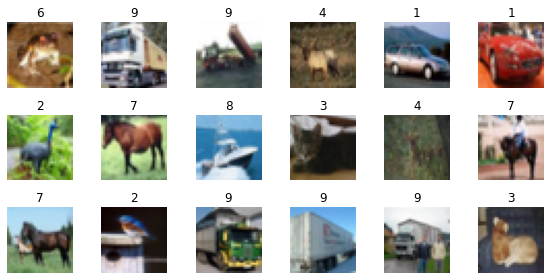

Testing


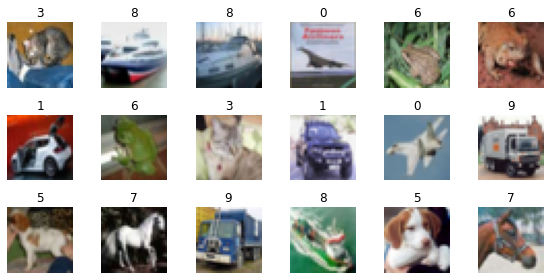

In [6]:
print("Training")
show_dataset_samples_img(orig_datasets['train'], cmap='gray')

print("Testing")
show_dataset_samples_img(orig_datasets['test'], cmap='gray')

In [7]:
datasets = apply_img_transforms(orig_datasets, dataset_type, flatten=True, augment=True)

In [8]:
dataloaders = get_dataloaders(datasets, 128, 128, num_workers=0)

In [9]:
input_dim = IMG_DATASET_TO_IMG_SIZE_FLAT[dataset_type]
num_classes = IMG_DATASET_TO_NUM_CLASSES[dataset_type]

model = ReLUToyModel(input_dim, num_classes, layer_dims=[])
model = model.to(device)

In [10]:
summary(model, (input_dim,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]          10,240
Total params: 10,240
Trainable params: 10,240
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.04
Estimated Total Size (MB): 0.04
----------------------------------------------------------------


In [11]:
model = QuantWrapper(model)

In [12]:
summary(model, (input_dim,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         QuantStub-1                 [-1, 1024]               0
            Linear-2                   [-1, 10]          10,240
      ReLUToyModel-3                   [-1, 10]               0
       DeQuantStub-4                   [-1, 10]               0
Total params: 10,240
Trainable params: 10,240
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.04
Estimated Total Size (MB): 0.05
----------------------------------------------------------------


In [13]:
#model.load_state_dict(torch.load(os.path.join(weights_dir, r"Experiment 11-18-2021 11-04-36 PM\Weights Best.pckl")))

In [14]:
num_epochs = 15

criterion = get_loss()
criterion = criterion.to(device)

optimizer = make_optimizer(model, optimzer_type=OptimizerType.SGD_MOMENTUM,
                           lr=0.001, weight_decay=1e-5, verbose=False)

In [ ]:
tracker = train_model(device=device,
                      model=model,
                      dataloaders=dataloaders,
                      criterion=criterion,
                      optimizer=optimizer,
                      lr_scheduler=None,
                      save_log=True,
                      save_model=True,
                      save_dir=weights_dir,
                      save_best=True,
                      save_latest=False,
                      save_all=False,
                      num_epochs=num_epochs)

----------
Epoch 1/15
----------
Training


Avg. Loss: 2.2306, Total Loss: 2.1121: 100%|█████████████████████████████████████████| 391/391 [01:54<00:00,  3.41it/s]


Training Loss: 2.2306
Training Accuracy: 0.1677
Testing


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 16.08it/s]


Testing loss: 2.1570
Testing accuracy: 0.2259

----------
Epoch 2/15
----------
Training


Avg. Loss: 2.1810, Total Loss: 2.1664: 100%|█████████████████████████████████████████| 391/391 [02:21<00:00,  2.76it/s]


Training Loss: 2.1810
Training Accuracy: 0.1970
Testing


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:05<00:00, 13.40it/s]


Testing loss: 2.1429
Testing accuracy: 0.2325

----------
Epoch 3/15
----------
Training


Avg. Loss: 2.1713, Total Loss: 2.2465: 100%|█████████████████████████████████████████| 391/391 [01:43<00:00,  3.76it/s]


Training Loss: 2.1713
Training Accuracy: 0.2062
Testing


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 17.60it/s]


Testing loss: 2.1268
Testing accuracy: 0.2489

----------
Epoch 4/15
----------
Training


Avg. Loss: 2.1640, Total Loss: 2.1104: 100%|█████████████████████████████████████████| 391/391 [01:45<00:00,  3.69it/s]


Training Loss: 2.1640
Training Accuracy: 0.2140
Testing


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:03<00:00, 19.87it/s]


Testing loss: 2.1165
Testing accuracy: 0.2466

----------
Epoch 5/15
----------
Training


Avg. Loss: 2.1641, Total Loss: 2.1268: 100%|█████████████████████████████████████████| 391/391 [01:39<00:00,  3.94it/s]


Training Loss: 2.1641
Training Accuracy: 0.2143
Testing


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 17.93it/s]


Testing loss: 2.1265
Testing accuracy: 0.2473

----------
Epoch 6/15
----------
Training


Avg. Loss: 2.1624, Total Loss: 2.1687: 100%|█████████████████████████████████████████| 391/391 [08:21<00:00,  1.28s/it]


Training Loss: 2.1624
Training Accuracy: 0.2159
Testing


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 27.67it/s]


Testing loss: 2.1135
Testing accuracy: 0.2388

----------
Epoch 7/15
----------
Training


Avg. Loss: 2.1582, Total Loss: 2.1722: 100%|█████████████████████████████████████████| 391/391 [01:12<00:00,  5.37it/s]


Training Loss: 2.1582
Training Accuracy: 0.2200
Testing


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 27.14it/s]


Testing loss: 2.1127
Testing accuracy: 0.2591

----------
Epoch 8/15
----------
Training


Avg. Loss: 2.1599, Total Loss: 2.1620: 100%|███████████████████████████████████████| 391/391 [1:01:38<00:00,  9.46s/it]


Training Loss: 2.1599
Training Accuracy: 0.2184
Testing


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 31.60it/s]


Testing loss: 2.1080
Testing accuracy: 0.2446

----------
Epoch 9/15
----------
Training


Avg. Loss: 2.1597, Total Loss: 2.2120: 100%|█████████████████████████████████████████| 391/391 [01:11<00:00,  5.44it/s]


Training Loss: 2.1597
Training Accuracy: 0.2199
Testing


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 30.28it/s]


Testing loss: 2.1049
Testing accuracy: 0.2516

----------
Epoch 10/15
----------
Training


Avg. Loss: 2.1601, Total Loss: 2.1728: 100%|█████████████████████████████████████████| 391/391 [01:18<00:00,  4.99it/s]


Training Loss: 2.1601
Training Accuracy: 0.2231
Testing


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 26.40it/s]


Testing loss: 2.1037
Testing accuracy: 0.2489

----------
Epoch 11/15
----------
Training


Avg. Loss: 2.1565, Total Loss: 2.2070: 100%|█████████████████████████████████████████| 391/391 [01:52<00:00,  3.47it/s]


Training Loss: 2.1565
Training Accuracy: 0.2223
Testing


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:03<00:00, 22.09it/s]


Testing loss: 2.1052
Testing accuracy: 0.2470

----------
Epoch 12/15
----------
Training


Avg. Loss: 2.1581, Total Loss: 2.0364: 100%|█████████████████████████████████████████| 391/391 [10:23<00:00,  1.59s/it]


Training Loss: 2.1581
Training Accuracy: 0.2217
Testing


100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 31.40it/s]


Testing loss: 2.1019
Testing accuracy: 0.2607

----------
Epoch 13/15
----------
Training


Avg. Loss: 2.1580, Total Loss: 2.1560:  17%|███████▏                                  | 67/391 [25:26<00:54,  5.96it/s]

In [ ]:
print(tracker.save_dir)